# BANGALORE HOUSE PRICE PREDICTION ANALYSIS

In [3]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [4]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/ASSIGNMENTS/Day 23 - 21st May/Assignments/KNN/bangalore house price prediction OHE-data.csv ")
    return data

In [5]:
# calling the function--
data= read_data()
print(data.head(2))

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                      

In [6]:
# data analysis--
data.shape

(7120, 108)

In [7]:
# printing basic info of the data--
print(data.columns)
print("==========================")
print(data.dtypes)
print("==========================")
print(data.info())

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)
bath                           float64
balcony                        float64
price                          float64
total_sqft_int                 float64
bhk                              int64
                                ...   
location_Hosur Road              int64
location_Horamavu Banaswadi      int64
location_Domlur                  int64
location_Mahadevpura             int64
location_Tumkur Road             int64
Length: 108, dtype: object


In [8]:
data["balcony"].unique()

array([2.        , 3.        , 1.        , 0.        , 1.58437574])

In [9]:
# data[data["balcony"].between(1.1,1.7)]
data[(data["balcony"]>1.1) & (data["balcony"]<1.7)]

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
48,2.0,1.584376,86.00,1200.0,2,7166.666667,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87,9.0,1.584376,500.00,4500.0,9,11111.111111,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
93,4.0,1.584376,333.00,3900.0,4,8538.461538,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
108,5.0,1.584376,110.00,2500.0,5,4400.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
127,4.0,1.584376,250.00,3245.0,4,7704.160247,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,2.0,1.584376,46.17,1200.0,2,3847.500000,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7077,9.0,1.584376,1900.00,12000.0,8,15833.333333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7080,5.0,1.584376,1950.00,10000.0,5,19500.000000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7093,5.0,1.584376,220.00,3600.0,4,6111.111111,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
(202/7120)*100

2.837078651685393

In [11]:
df=data[(data["balcony"]==0)|(data["balcony"]==1) |(data["balcony"]==2)|(data["balcony"]==3)]
df.head(2)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df["balcony"].unique()

array([2., 3., 1., 0.])

In [13]:
print("Total no of houses are --",len(df))
print("Houses with Super built-up Area--",len(df[df['area_typeSuper built-up  Area']==1]))
print("Houses with Built-up Area--",len(df[df['area_typeBuilt-up  Area']==1]))
print("Houses with Plot Area--",len(df[df['area_typePlot  Area']==1]))
print("-----------------")
print("Upto {} BHK houses are available.".format(df['bhk'].max()))
print("No of Ready to Move Houses are--",len(df[df['availability_Ready To Move']==1]))
print("-----------------")
print("Average price per sqft--",df["price_per_sqft"].mean())

Total no of houses are -- 6918
Houses with Super built-up Area-- 5212
Houses with Built-up Area-- 1257
Houses with Plot Area-- 417
-----------------
Upto 9 BHK houses are available.
No of Ready to Move Houses are-- 5465
-----------------
Average price per sqft-- 5868.9193989551


In [14]:
# checking the missing values--
data.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [15]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [16]:
# renaming the columns--
df1=df.rename({'area_typeSuper built-up  Area':"super_builtup_area",'area_typeBuilt-up  Area':"builtup_area",'area_typePlot  Area':"plot_area",'availability_Ready To Move':"available"},axis=1)
df1.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df1.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

# Exploratory Data Analysis

<Axes: >

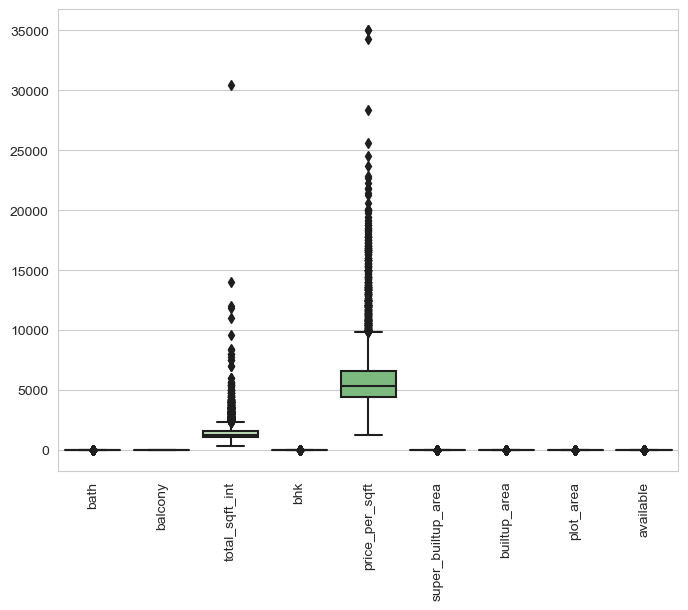

In [18]:
# checking the outliers--
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=df1.loc[:, ['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available']],palette="Greens")

Text(0.5, 1.0, 'Size of BHKs V/S Price per sqft area')

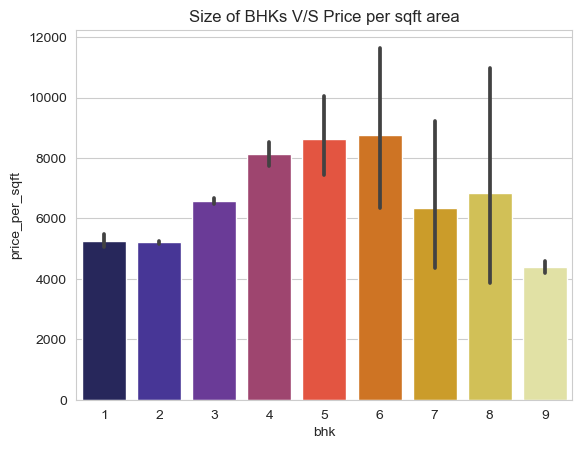

In [19]:
sns.barplot(x="bhk",y="price_per_sqft",data=df1,palette='CMRmap')
plt.title("Size of BHKs V/S Price per sqft area")

Text(0.5, 1.0, 'Count of BHKs')

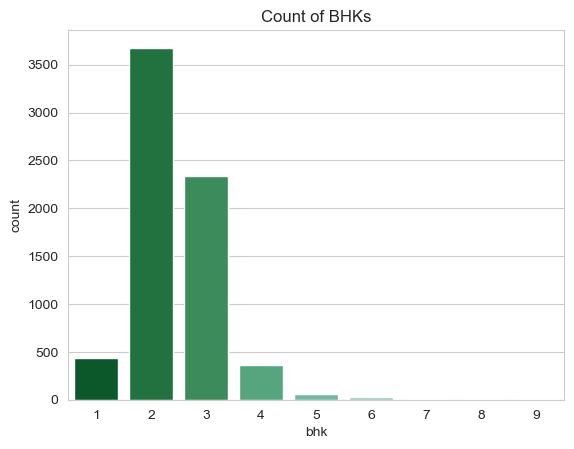

In [20]:
sns.countplot(x="bhk",data=df1,palette='BuGn_r')
plt.title("Count of BHKs")

Text(0.5, 1.0, 'Size of BHKs V/S Price per sqft area')

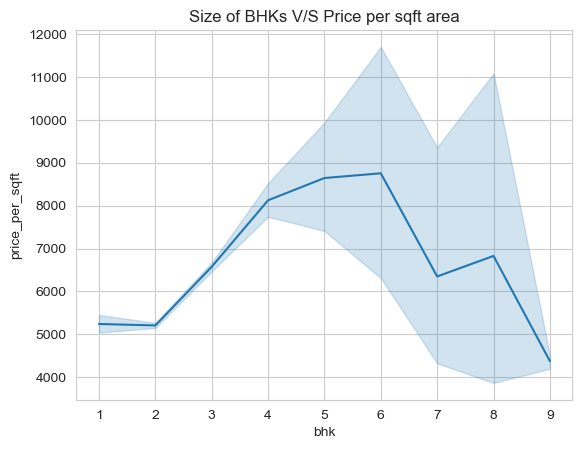

In [21]:
sns.lineplot(x="bhk",y=df1["price_per_sqft"],data=df1)
plt.title("Size of BHKs V/S Price per sqft area")

C:\Users\Amdin\AppData\Local\Temp\ipykernel_4188\3942786914.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfn=df1[(df1["bhk"]==2)|(data["bhk"]==3)]


Text(0.5, 1.0, 'Comparing Price per sqft area of 2 BHK V/S 3 BHK')

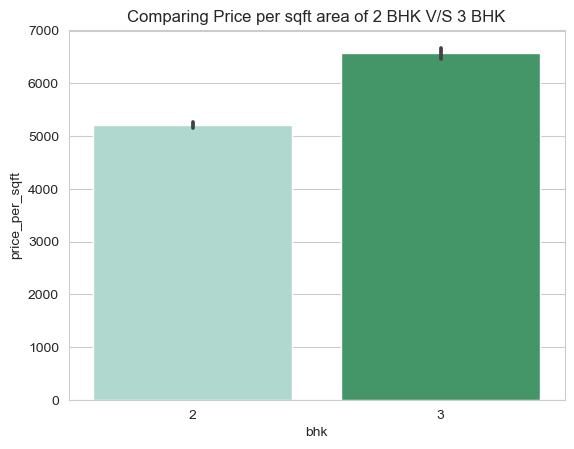

In [22]:
dfn=df1[(df1["bhk"]==2)|(data["bhk"]==3)]
sns.barplot(x="bhk",y="price_per_sqft",data=dfn,palette='BuGn')
plt.title("Comparing Price per sqft area of 2 BHK V/S 3 BHK")

C:\Users\Amdin\AppData\Local\Temp\ipykernel_4188\1698438677.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='balcony',y='price_per_sqft',data=df1,palette='PuBuGn')


Text(0.5, 1.0, 'No of Balconies V/S Price per sqft area')

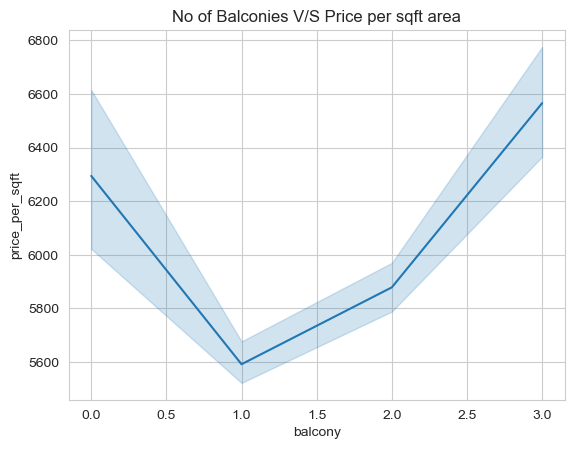

In [23]:
sns.lineplot(x='balcony',y='price_per_sqft',data=df1,palette='PuBuGn')
plt.title("No of Balconies V/S Price per sqft area")

In [24]:
df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
     'super_builtup_area','builtup_area', 'plot_area', 'available']].corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available
bath,1.000000,0.300074,0.510338,0.676229,0.875053,0.335517,-0.111749,0.031170,0.152927,0.016270
balcony,0.300074,1.000000,0.154844,0.233158,0.284045,0.070028,0.122504,-0.049171,-0.142729,0.118364
price,0.510338,0.154844,1.000000,0.777053,0.488212,0.734374,-0.109201,-0.012394,0.221210,0.012499
total_sqft_int,0.676229,0.233158,0.777053,1.000000,0.674932,0.385540,-0.128785,0.016462,0.210531,0.014851
bhk,0.875053,0.284045,0.488212,0.674932,1.000000,0.312623,-0.134302,0.043292,0.170791,0.038208
price_per_sqft,0.335517,0.070028,0.734374,0.385540,0.312623,1.000000,-0.102511,-0.025839,0.229835,0.036447
super_builtup_area,-0.111749,0.122504,-0.109201,-0.128785,-0.134302,-0.102511,1.000000,-0.823633,-0.442681,-0.118815
builtup_area,0.031170,-0.049171,-0.012394,0.016462,0.043292,-0.025839,-0.823633,1.000000,-0.119344,0.115049
plot_area,0.152927,-0.142729,0.221210,0.210531,0.170791,0.229835,-0.442681,-0.119344,1.000000,0.027709
available,0.016270,0.118364,0.012499,0.014851,0.038208,0.036447,-0.118815,0.115049,0.027709,1.000000


<Axes: >

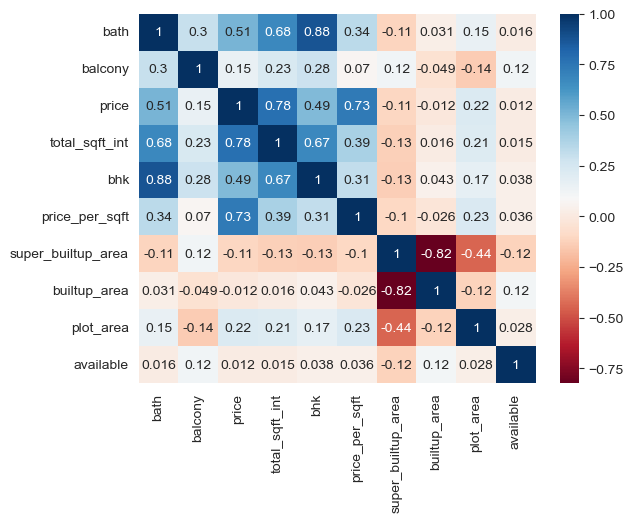

In [25]:
sns.heatmap(df1 [['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft','super_builtup_area',
                  'builtup_area', 'plot_area', 'available']].corr(),annot=True,cmap="RdBu")

# KNN Regression

In [26]:
# model building--
X=df1[['bath', 'balcony', 'total_sqft_int', 'bhk','price_per_sqft','super_builtup_area',
       'builtup_area', 'plot_area', 'available']]
y=df1['price']

In [27]:
# sampling of data--
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return  X_train,X_test,y_train,y_test

In [28]:
# calling the train_test function--
X_train,X_test,y_train,y_test=train_test(X,y)

(5534, 9)
(5534,)
(1384, 9)
(1384,)


In [29]:
# defining--
def modelling(X_train,y_train,X_test):
    model=KNeighborsRegressor(n_neighbors=22)
    model_train=model.fit(X_train,y_train)
    print("Model training is completed")
    pred=model_train.predict(X_test)
    return pred

In [30]:
pred=modelling(X_train,y_train,X_test)
print(pred)

Model training is completed
[95.78045455 51.77454545 16.22045455 ... 47.10045455 65.53318182
 50.40136364]


In [31]:
r2score=(round(r2_score(y_test,pred)*100,2))
print('r2score:',r2score)

r2score: 78.3


In [32]:
rmse = m.sqrt(mean_squared_error(y_test,pred))
print('RMSE:',rmse)

RMSE: 50.582725043507025


In [33]:
mae=mean_absolute_error(y_test,pred)
print('MAE:', mae)

MAE: 4.590238603520756


In [34]:
# choosing k---sqrt(n)--
(len(df1))
sqrt(len(df1))

83.17451532771321

In [35]:
# error method
error_rate=[]
for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(1-r2_score(y_test,pred_i))
error_rate

[0.005479123010749265,
 0.05409306930762148,
 0.1067413288955954,
 0.0890612227187032,
 0.10031576962157795,
 0.1303040097792294,
 0.1438600776347826,
 0.16353429782238904,
 0.18657543338216076,
 0.19434376831980316,
 0.186634395701626,
 0.1777894033117452,
 0.19422689185585895,
 0.1992283550514936,
 0.20833110691211176,
 0.21878816427211922,
 0.2250688388598634,
 0.2297235962894244,
 0.23263971011333218,
 0.24021784654653588,
 0.22901466214503963,
 0.21700861875215627,
 0.22352635138503718,
 0.22651389008156564,
 0.2316546947585013,
 0.23593682059451848,
 0.2416769587687746,
 0.24505876621252087,
 0.25117142877426546,
 0.2555515732083623,
 0.25743590313094167,
 0.2595068868306485,
 0.2629018462042212,
 0.265097336852991,
 0.2683672227533139,
 0.272775406440523,
 0.2755703266657169,
 0.2786348354428837,
 0.27989994241732985,
 0.2812130850851261,
 0.2845478908842909,
 0.2879122705662842,
 0.2901877681057603,
 0.2930806869668612,
 0.2960095178612595,
 0.2985395885556872,
 0.3008701958007

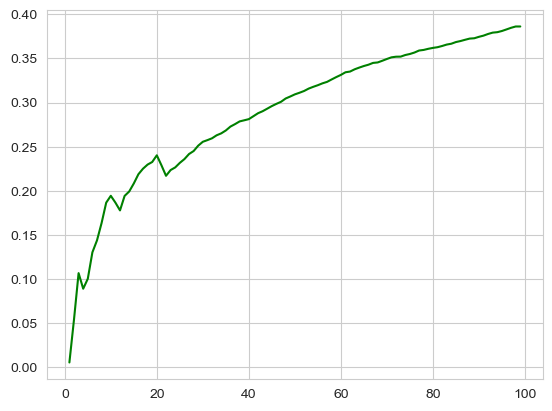

In [36]:
plt.plot(range(1,100),error_rate,color="green")